### Importing useful Libraries

In [2]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pylab as plt


### Downloading NLTK data files

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading data

In [5]:
df_news = pd.read_csv('../Data/raw_analyst_ratings.csv')
headlines = df_news['headline']

### Stemming and Stop word Removing

In [6]:
# Initialize the PorterStemmer
ps = PorterStemmer()

# Define a function to clean and process the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Perform stemming
    words = [ps.stem(word) for word in words]
    
    # Rejoin the words into a single string
    processed_text = ' '.join(words)
    return processed_text

# Sentiment Analysis with TextBlob

In [7]:
# Define a function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

### Applying the Functions to the DataFrame

In [48]:
# List of stock symbols for filtering
stock_symbols = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'META', 'NVDA', 'TSLA']

# Filter rows where the stock symbol is in the specified list
df_news_filtered = df_news[df_news['stock'].isin(stock_symbols)]

# Apply text preprocessing and sentiment analysis to the filtered DataFrame
df_news_filtered['cleaned_headline'] = df_news_filtered['headline'].apply(preprocess_text)
df_news_filtered['sentiment'] = df_news_filtered['cleaned_headline'].apply(calculate_sentiment)

# Update the original DataFrame with the processed data
df_news.update(df_news_filtered)


C:\Users\Admin\AppData\Local\Temp\ipykernel_15656\2764048879.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_filtered['cleaned_headline'] = df_news_filtered['headline'].apply(preprocess_text)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15656\2764048879.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_filtered['sentiment'] = df_news_filtered['cleaned_headline'].apply(calculate_sentiment)


### Separate Date and Time

In [76]:
# Convert the 'date' column to datetime format with ISO8601 and set timezone to UTC
df_news_filtered['date'] = pd.to_datetime(df_news_filtered['date'], format='%Y-%m-%d %H:%M:%S', utc=True, errors='coerce')

# Extract the date and time into separate columns
df_news_filtered['date_only'] = df_news_filtered['date'].dt.date
df_news_filtered['time_only'] = df_news_filtered['date'].dt.time

# Drop rows with invalid datetime entries if necessary
df_news_filtered = df_news_filtered.dropna(subset=['date'])

In [77]:
df_news_filtered.head()

,Unnamed: 0,headline,url,publisher,date,stock,cleaned_headline,sentiment,time,date_only,time_only
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 00:00:00+00:00,AAPL,tech stock faang strong start day market await...,0.433333,11:33:26,2020-06-10,00:00:00
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10 00:00:00+00:00,AAPL,10 biggest price target chang wednesday,0.000000,08:14:08,2020-06-10,00:00:00
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 00:00:00+00:00,AAPL,"benzinga pro' top 5 stock watch wed., jun. 10,...",0.500000,07:53:47,2020-06-10,00:00:00
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10 00:00:00+00:00,AAPL,"deutsch bank maintain buy apple, rais price ta...",0.000000,07:19:25,2020-06-10,00:00:00
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10 00:00:00+00:00,AAPL,"appl let user trade mac comput credit us, cana...",0.000000,06:27:11,2020-06-10,00:00:00


In [78]:
df_news_filtered.tail()



,Unnamed: 0,headline,url,publisher,date,stock,cleaned_headline,sentiment,time,date_only,time_only
1255226,1261145,Tesla Shares Mark Session And New All-Time Hig...,https://www.benzinga.com/hot/20/06/16221958/te...,Benzinga Newsdesk,2020-06-10 00:00:00+00:00,TSLA,"tesla share mark session new all-tim high $1,000",0.148182,09:58:54,2020-06-10,00:00:00
1255227,1261146,Wedbush Says Tesla Has 'Game Changing' Develop...,https://www.benzinga.com/analyst-ratings/analy...,Jayson Derrick,2020-06-10 00:00:00+00:00,TSLA,wedbush say tesla 'game changing' developments...,-0.400000,09:00:24,2020-06-10,00:00:00
1255228,1261147,"Wedbush Maintains Neutral on Tesla, Raises Pri...",https://www.benzinga.com/news/20/06/16220834/w...,Benzinga Newsdesk,2020-06-10 00:00:00+00:00,TSLA,"wedbush maintain neutral tesla, rais price tar...",0.000000,08:43:13,2020-06-10,00:00:00
1255229,1261148,Musk Says It's Time To Ramp Production Of Tesl...,https://www.benzinga.com/news/20/06/16220141/m...,Tanzeel Akhtar,2020-06-10 00:00:00+00:00,TSLA,musk say time ramp product tesla semi: report,0.000000,08:14:33,2020-06-10,00:00:00
1255230,1261149,Tesla shares are trading higher after Wedbush ...,https://www.benzinga.com/wiim/20/06/16220126/t...,Benzinga Newsdesk,2020-06-10 00:00:00+00:00,TSLA,tesla share trade higher wedbush rais price ta...,0.250000,07:55:49,2020-06-10,00:00:00


## Visualization

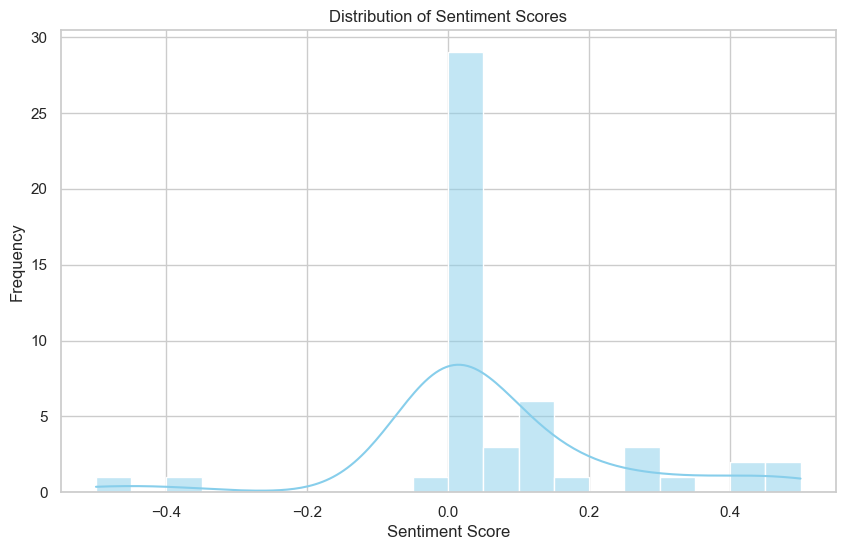

In [80]:

sns.set(style="whitegrid")

# Histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df_news_filtered['sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

### Sentiment Scores by Category

C:\Users\Admin\AppData\Local\Temp\ipykernel_15656\2357371551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df_news_filtered, palette='viridis')


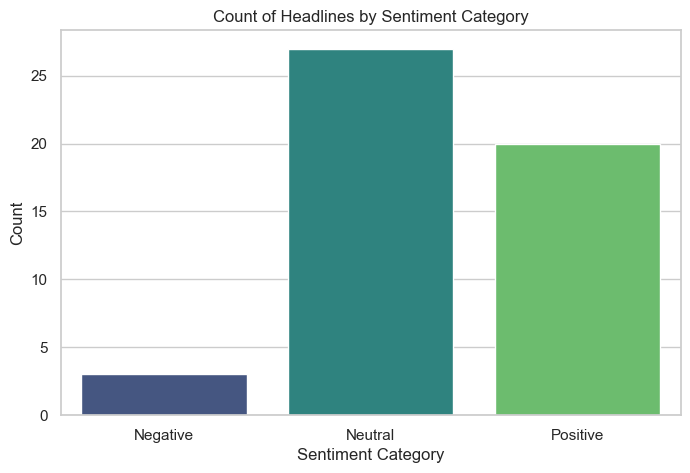

In [83]:
df_news_filtered['sentiment_category'] = pd.cut(df_news_filtered['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])

# Bar plot of sentiment categories
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_category', data=df_news_filtered, palette='viridis')
plt.title('Count of Headlines by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Correlation

In [84]:
file_paths = {
    'Apple': '../data/yfinance_data/AAPL_historical_data.csv',
    'Amazon': '../data/yfinance_data/AMZN_historical_data.csv',
    'Google': '../data/yfinance_data/GOOG_historical_data.csv',
    'Meta': '../data/yfinance_data/META_historical_data.csv',
    'Microsoft': '../data/yfinance_data/MSFT_historical_data.csv',
    'Tesla': '../data/yfinance_data/TSLA_historical_data.csv',
    'Nvidia': '../data/yfinance_data/NVDA_historical_data.csv'
}

### Merging the files

In [98]:
data_frames = []
for company, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    df['Company'] = company  # Add a column for the company name
    data_frames.append(df)

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(data_frames, ignore_index=True)
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Date', 'Company']

if not all(col in merged_df.columns for col in required_columns):
    raise ValueError('Data does not contain the required columns')

# Convert the 'Date' column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce', utc=True)

# Create separate 'date_only' and 'time_only' columns
merged_df['date_only'] = merged_df['Date'].dt.date  # Extract the date
merged_df['time_only'] = merged_df['Date'].dt.time  # Extract the time
merged_df.drop(columns=['Date'], inplace=True)

# Optionally, drop rows with NaT values if there are any
merged_df.dropna(subset=['date_only', 'time_only'], inplace=True)

In [101]:
merged_df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company,date_only,time_only
0,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,Apple,1980-12-12,00:00:00
1,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,Apple,1980-12-15,00:00:00
2,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,Apple,1980-12-16,00:00:00
3,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,Apple,1980-12-17,00:00:00
4,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,Apple,1980-12-18,00:00:00


In [102]:
df_news_filtered['date_only'] = pd.to_datetime(df_news_filtered['date_only'])
merged_df['date_only'] = pd.to_datetime(merged_df['date_only'])

# Merge the DataFrames on the 'date_only' column
combined_df = pd.merge(df_news_filtered, merged_df, on='date_only', how='inner')

# Drop rows with missing values if necessary
combined_df.dropna(subset=['sentiment', 'Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)

# Calculate correlation between sentiment and stock metrics
correlation_results = combined_df[['sentiment', 'Open', 'High', 'Low', 'Close', 'Volume']].corr()

print(correlation_results)

           sentiment      Open      High       Low     Close    Volume
sentiment   1.000000  0.006952  0.006566  0.006062  0.004571  0.028074
Open        0.006952  1.000000  0.999645  0.999866  0.999409 -0.717193
High        0.006566  0.999645  1.000000  0.999875  0.999884 -0.716877
Low         0.006062  0.999866  0.999875  1.000000  0.999776 -0.719742
Close       0.004571  0.999409  0.999884  0.999776  1.000000 -0.717935
Volume      0.028074 -0.717193 -0.716877 -0.719742 -0.717935  1.000000


Columns in DataFrame: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits', 'Company', 'date_only', 'time_only'],
      dtype='object')


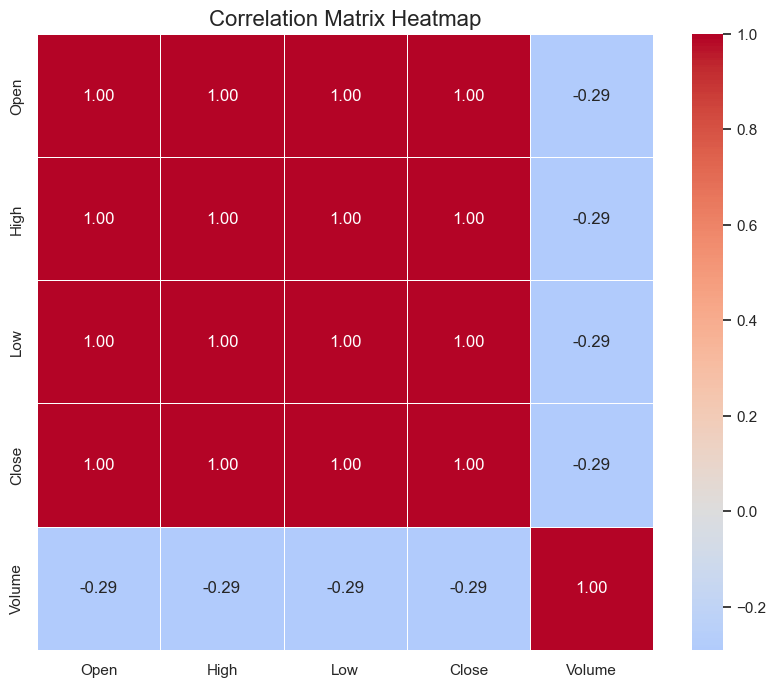

In [105]:


print("Columns in DataFrame:", merged_df.columns)
required_columns = ['sentiment', 'Open', 'High', 'Low', 'Close', 'Volume']
existing_columns = [col for col in required_columns if col in merged_df.columns]

# Calculate the correlation matrix only with existing columns
corr_matrix = merged_df[existing_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)

# Set titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()
